# Create a Gantt Chart
This small notebook shows how to use the Rantt class for creating a Gantt Chart. 

In [1]:
# These two lines are necessary if Rantt is not installed
# i.e. for navigating to the rantt.py file
import sys
sys.path.append("../")

import rantt

In [2]:
# Load the csv File
inp = rantt.Gantt_chart('../activities.csv')

In [3]:
# Present the table form or the Gantt Chart
inp.showCSV()

,workstream,activity,start date,end date
0,WP1,Draft Proposal,2019-01-15,2019-03-01
1,WP1,Proofread,2019-02-20,2019-03-01
2,WP2,Set up data base,2019-03-15,2019-05-01
3,WP2,Implement data model,2019-04-01,2019-05-01
4,WP3,Prepare kick-off meeting,2019-02-01,2019-02-10


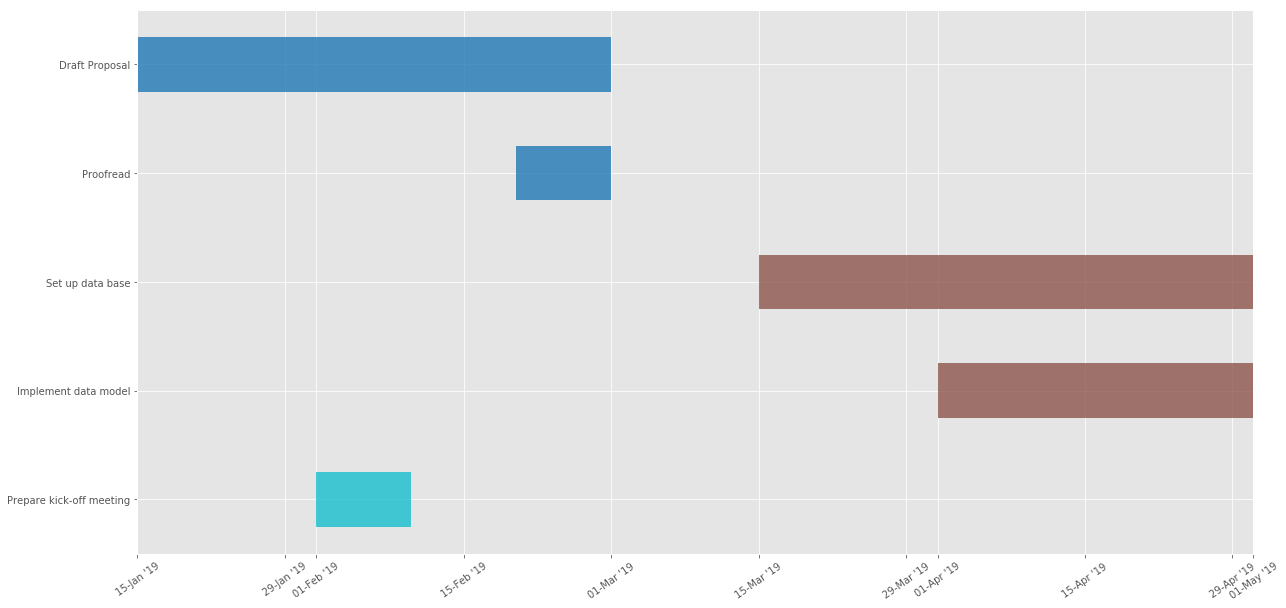

In [4]:
# Plot the Gantt Chart
inp.preparePlot(style='ggplot')